In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score  
from sklearn.metrics import f1_score 
from sklearn import metrics  
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc  
from sklearn.metrics import accuracy_score,precision_score

In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [3]:
path="C:\\Users\\Gillian\\Documents\\Tencent Files\\1302851529\\FileRecv\\ex2data1.txt"
data=pd.read_csv(path,header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
cols=data.shape[1]
X_data=data.iloc[:,:cols-1]
Y_data=data.iloc[:,cols-1:]

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=42)

标准化

In [6]:
xmean = X_train.mean()  
xstd = X_train.std()    

xstd[xstd == 0] = 1e-7
 
X_train= (X_train - xmean) / xstd  
X_test=(X_test- xmean) / xstd  

In [7]:
X_train.insert(0, 'Ones', 1)
X_test.insert(0,'Ones',1)

In [8]:
Xtr=X_train.values
Ytr=Y_train.values
Xte=X_test.values
Yte=Y_test.values

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
feature_dim=X_train.shape[0]
W=np.zeros((feature_dim,1))

In [11]:
def computeCost(X, Y, W):  
    P = sigmoid(np.dot(X,W))
    loss = np.sum(-Y*np.log(P)-(1-Y)* np.log(1- P))/X.shape[0] 
    return loss

In [12]:
def gradientDecent(X, Y,W,alpha): 
    error=np.dot(X,W)-Y
    grad = (1 / X.shape[0]) * np.dot(X.T, error)
    W-= alpha * grad
    return W

In [13]:
def logisticRegression(X,Y,alpha,iters):
    feature_dim =X.shape[1]
    W=np.zeros((feature_dim,1))
    loss_his=[]
    w_data=[]
    for i in range(iters):
        loss = computeCost(X, Y, W)  # 计算损失
        loss_his.append(loss)  # 将损失添加到历史记录中
        W = gradientDecent(X, Y, W, alpha)  # 执行梯度下降更新权重
        w_data.append(W.copy()) 
    return loss_his,w_data

In [14]:
alpha =0.01
iters = 10000
loss_his,w_data = logisticRegression(Xtr,Ytr, alpha, iters)
loss_train=[]
loss_test=[]
for w in w_data:
    loss_train.append(computeCost(Xtr,Ytr,w))
    loss_test.append(computeCost(Xte,Yte,w))

Text(0, 0.5, 'loss')

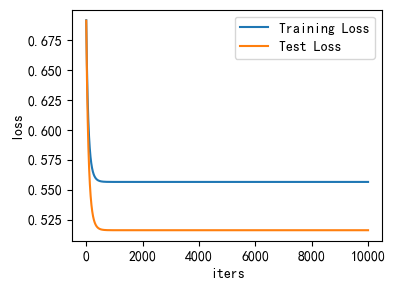

In [15]:
plt.figure(figsize=(4,3))
x = np.arange(iters)
plt.plot(x, loss_train, label='Training Loss')
plt.plot(x, loss_test, label='Test Loss')
plt.legend()  
plt.xlabel("iters")
plt.ylabel("loss")

In [16]:
def predict(w,X):
    probability = sigmoid(X@w)
    y_hat = probability >=0.5
    return probability,y_hat

测试集的准确度和精确度

In [17]:
w_last=w_data[-1]
probability,y_pre=predict(w_last,X_test)
#准确度
acc =accuracy_score(Y_test,y_pre)
#精确度
precision =precision_score(Y_test,y_pre)
print(acc,precision)

0.7666666666666667 0.75


recall值

In [19]:
recall=recall_score(Y_test, y_pre)

In [20]:
(recall)

1.0

F1分数

In [21]:
F1score=f1_score(Y_test, y_pre, average='binary')

In [22]:
(F1score)

0.8571428571428571

roc曲线和AUC值

In [23]:
fpr, tpr, thresholds = roc_curve(Y_test, probability)  

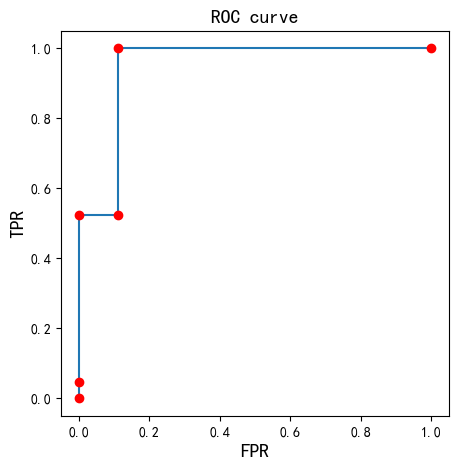

In [24]:
plt.figure(figsize=(5,5))
plt.title("ROC curve",fontsize=14)
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,"ro")
plt.ylabel("TPR",fontsize=14)
plt.xlabel("FPR",fontsize=14)
plt.show()

In [25]:
AUC=auc(fpr, tpr)

In [26]:
print(AUC)

0.947089947089947
